# Training and classification

In [1]:
import random

import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
image_path = 'samples/fruits.jpg'
image = cv2.imread(image_path)

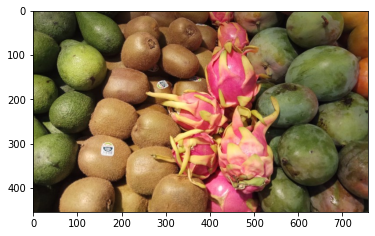

In [3]:
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)

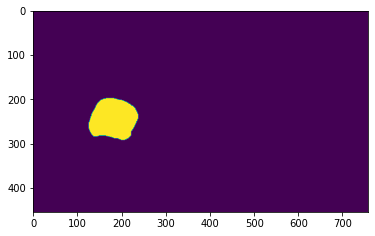

In [4]:
kiwi_mask = cv2.imread('samples/fruits_mask.png')
kiwi_mask = kiwi_mask[:, :, 0]
plt.imshow(kiwi_mask)

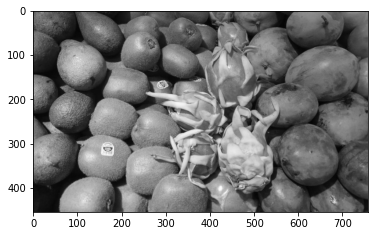

In [5]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

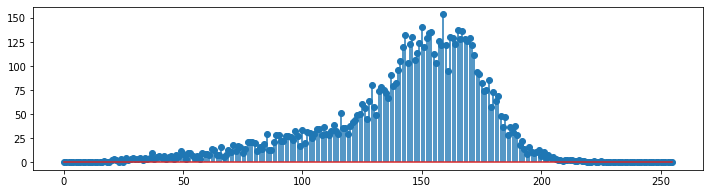

In [6]:
kiwi_hist = cv2.calcHist([gray], [0], kiwi_mask, [256], [0, 256])
plt.figure(figsize=(12, 3))
plt.stem(kiwi_hist)
plt.show()

In [7]:
n_rows, n_columns = gray.shape[:2]
radius = 20
row = 250
column = 150

In [8]:
reference = gray[row-radius:row+radius+1, column-radius:column+radius+1]
distances = []
for j in range(radius, n_columns - radius):
    window = gray[row-radius:row+radius+1, j-radius:j+radius+1]
    distance = np.linalg.norm(window - reference)
    distances.append(distance)

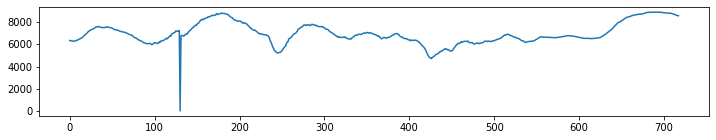

In [9]:
plt.figure(figsize=(12, 2))
plt.plot(distances)
plt.show()

In [10]:
reference = gray[row-radius:row+radius+1, column-radius:column+radius+1]
reference = np.sort(reference.flatten())
distances = []
for j in range(radius, n_columns - radius):
    window = np.sort(gray[row-radius:row+radius+1, j-radius:j+radius+1].flatten())
    distance = np.linalg.norm(window - reference)
    distances.append(distance)

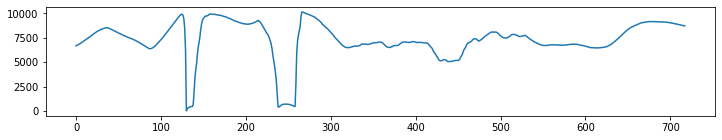

In [11]:
plt.figure(figsize=(12, 2))
plt.plot(distances)
plt.show()

In [12]:
gray.shape[0] * gray.shape[1]

344890

In [13]:
n_result_rows = len(list(range(radius, n_rows - radius, 10)))
n_result_columns = len(list(range(radius, n_columns - radius, 10)))
distances = np.zeros((n_result_rows, n_result_columns), dtype=float)
for ri, i in enumerate(range(radius, n_rows - radius, 10)):
    for rj, j in enumerate(range(radius, n_columns - radius, 10)):
        window = np.sort(gray[i-radius:i+radius+1, j-radius:j+radius+1].flatten())
        distance = np.linalg.norm(window - reference)
        distances[ri, rj] = distance

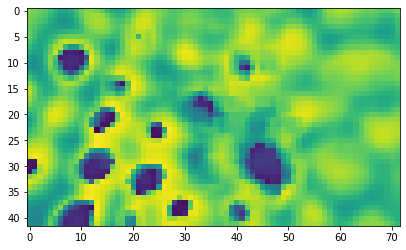

In [14]:
plt.figure(figsize=(12, 4))
plt.imshow(distances)
plt.show()

$\rhd$ Clusterize and display the sorted intensities!

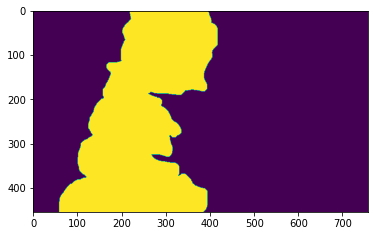

In [15]:
mask = cv2.imread('samples/fruits_kiwis.png')
mask = mask[:, :, 0]
plt.imshow(mask)

## Neural Network

https://scikit-learn.org/stable/modules/neural_networks_supervised.html

In [16]:
from sklearn.neural_network import MLPClassifier

In [17]:
21*21

441

In [18]:
radius = 10
n_samples = 5000
X = np.zeros((n_samples, (2*radius + 1)**2), dtype=int)
y = [0] * n_samples
for i in range(n_samples):
    row = random.randint(radius, 100)
    column = random.randint(radius, n_columns - radius - 1)
    # window = np.sort(gray[row-radius:row+radius+1, column-radius:column+radius+1].flatten())
    window = gray[row-radius:row+radius+1, column-radius:column+radius+1].flatten()
    label = 0
    if mask[row, column] > 0:
        label = 1
    X[i, :] = window
    y[i] = label

In [19]:
classifier = MLPClassifier(hidden_layer_sizes=(50, 50), random_state=1)

In [20]:
classifier.fit(X, y)

MLPClassifier(hidden_layer_sizes=(50, 50), random_state=1)

In [21]:
colors = [
    (255, 0, 0),
    (0, 255, 0)
]

In [22]:
result = np.zeros((n_rows, n_columns, 3), dtype=int)
for i in range(radius, 400, 10):
    for j in range(100, 700, 10):
        # window = np.sort(gray[i-radius:i+radius+1, j-radius:j+radius+1].flatten())
        window = gray[i-radius:i+radius+1, j-radius:j+radius+1].flatten()
        label = classifier.predict([window])[0]
        label = 0 if mask[i, j] == 0 else 1
        result[i, j] = colors[label]

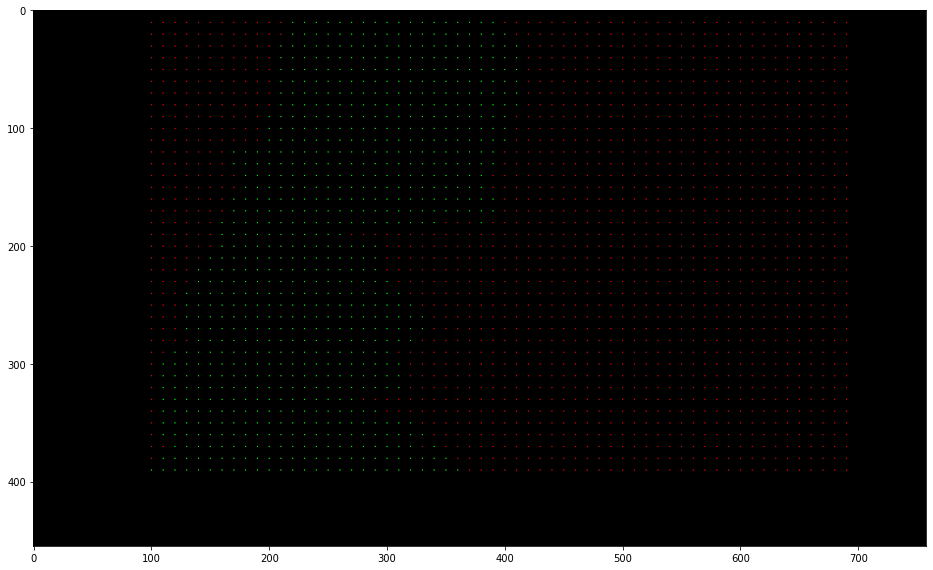

In [23]:
plt.figure(figsize=(16, 14))
plt.imshow(result)
plt.savefig('kwr2.png')

In [24]:
result.shape

(455, 758, 3)